# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/full-x4/2021-10-21_09-38-18"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,21/10/2021_09:38:21,235,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.63,36.38,44.94,55.13,30.12,Apagado
1,21/10/2021_09:38:27,177,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.56,36.38,44.94,54.94,30.12,Prendido
2,21/10/2021_09:38:32,2094,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.56,36.38,44.94,54.88,30.12,Prendido
3,21/10/2021_09:38:38,5000,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.56,36.38,44.94,54.94,30.12,Prendido
4,21/10/2021_09:38:44,5000,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.56,36.38,44.94,55.13,30.12,Apagado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21/10/2021_09:47:38,121,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.44,36.38,45.06,55.06,30.12,Apagado
96,21/10/2021_09:47:44,120,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.50,36.38,45.06,54.88,30.12,Prendido
97,21/10/2021_09:47:50,123,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.50,36.31,45.06,54.69,30.06,Prendido
98,21/10/2021_09:47:55,123,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,32.50,36.38,45.06,54.81,30.06,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

21/10/2021_09:38:21


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

42


In [7]:
# Llenemos las listas con los datos
for i in range(n-1):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

# Gráficos

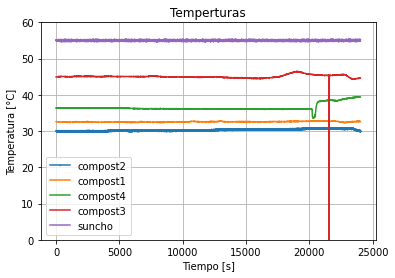

In [10]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho,'.-',markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1,'-',markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2,'-',markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3,'-',markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4,'-',markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,60)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

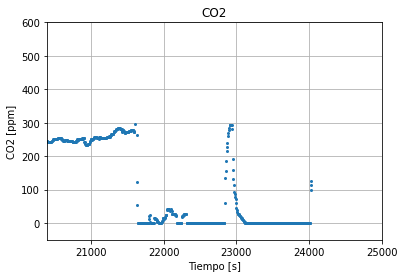

In [14]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".",markersize=4)
plt.grid()
plt.ylim(-50,600)
plt.xlim(20400,25000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.savefig(f"{PATH}/figuras/CO2.png")
plt.show()